# Sections

- [Read data](#read_data)
    * [Read counts data](#read_counts_data)
    * [Read Mid-probability table](#read_Mid-probability_table)
    
- [Hypothesis III](#hypothesis3)
    * [Reproduce results](#reproduce_results_hypothesis3)
    * [Test for individuals in the lab](#individuals_hypothesis3)

- [Permutation test](#permutation_test)

    * [Terminal digit analysis](#terminal_digit_analysis)
    * [Equal digit analysis](#equal_digit_analysis)



In [154]:
from __future__ import division, generators, absolute_import, print_function

import numpy as np
import scipy.stats
import pandas as pd
import random
import matplotlib.pyplot as plt

data_dir = '../data/'

<a id='read_data'></a>
# Read Data

<a id='read_counts_data'></a>
## Read counts data

In [148]:
def read_data(data_dir, file_name, skiprows, triple_col):
    """
    This function reads data from xlsx file, and remove triples with 
    at least one missing read counts in the triple
    
    Parameters
    ----------
        data_dir: string
            data directory
        file_name: string
            xlsx file name
        skiprows: int
            rows to skip at the beginning
        triple_col: list of string
            a list of length 3, the column name for the triple in the xlsx file
    
    Returns
    -------
        df: pandas.core.frame.DataFrame
            pandas data frame with triple column named col1, col2 and col3
        filtered_df: pandas.core.frame.DataFrame
            pandas data frame with triple column named col1, col2 and col3,
            each triple is sorted by increasing order,
            triples with gap less than or equal to 1 are filtered out
    """
    df = pd.read_excel(data_dir + file_name, skiprows = skiprows)
    df[triple_col] = df[triple_col].apply(
        lambda x: pd.to_numeric(x, errors='coerce'))
    counts = df[triple_col].values.flatten()
    counts = counts[~np.isnan(counts)]
    nan_index = df[triple_col].apply(np.isnan).any(1).nonzero()[0]
    col_name = ['col1', 'col2', 'col3']
    df = df.rename(columns = {triple_col[0]: col_name[0],
                              triple_col[1]: col_name[1],
                              triple_col[2]: col_name[2]})
    df = df.drop(df.index[nan_index])
    df = df.reset_index(drop=True)
    
    # sort each triple by increasing order
    filtered_df = df.copy(deep=True)
    filtered_df[col_name] = filtered_df[col_name].apply(np.sort, axis = 1)
    
    # filter out the triples with gap less than or equal to 1
    complete_index = filtered_df[col_name].apply(
        lambda x: x.col3 - x.col1 <=1, axis=1).nonzero()[0]
    filtered_df = filtered_df.drop(filtered_df.index[complete_index])
    filtered_df = filtered_df.reset_index(drop=True)
    
    return counts, df, filtered_df

In [149]:
# colony data: RTS
counts_rts_colony, rts_colony, filtered_rts_colony = read_data(
    data_dir, 'Bishayee Colony Counts 10.27.97-3.8.01.xlsx', 
    skiprows=2, triple_col=['col1', 'col2', 'col3'])

# colony data: other invectigators in the lab
counts_inv_colony, inv_colony, filtered_inv_colony = read_data(
    data_dir, 'Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx', 
    skiprows=1, triple_col=['col1', 'col2', 'col3'])

# colony data: outside lab
counts_lab_colony, lab_colony, filtered_lab_colony = read_data(
    data_dir, 'Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx', 
    skiprows=1, triple_col=['c1', 'c2', 'c3'])

In [150]:
# coulter data: RTS
counts_rts_coulter, rts_coulter, filtered_rts_coulter = read_data(
    data_dir, 'Bishayee Coulter Counts.10.20.97-7.16.01.xlsx', 
    skiprows=1, triple_col=['Count 1', 'Count 2', 'Count 3'])

# coulter data: other invectigators in the lab
counts_inv_coulter, inv_coulter, filtered_inv_coulter = read_data(
    data_dir, 'Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx', 
    skiprows=1, triple_col=['Coul 1', 'Coul 2', 'Coul 3'])

# coulter data: outside lab1
counts_lab1_coulter, lab1_coulter, filtered_lab1_coulter = read_data(
    data_dir, 'Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx', 
    skiprows=0, triple_col=['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'])

# coulter data: outside lab2
counts_lab2_coulter, lab2_coulter, filtered_lab2_coulter = read_data(
    data_dir, 'Outside Lab 2.Coulter Counts.6.6.08-7.7.08.xlsx', 
    skiprows=1, triple_col=['Count 1', 'Count 2', 'Count 3'])

In [165]:
print("Number of triples in RTS colony data: ", rts_colony.shape[0], 
      "(after filtering:", filtered_rts_colony.shape[0], ", counts:", len(counts_rts_colony), ")")
print("Number of triples in other invectigators colony data: ", inv_colony.shape[0],
      "(after filtering:", filtered_inv_colony.shape[0], ", counts:", len(counts_inv_colony), ")")
print("Number of triples in outside lab colony data: ", lab_colony.shape[0],
      "(after filtering:", filtered_lab_colony.shape[0], ", counts:", len(counts_lab_colony), ")")
print("Number of triples in RTS coulter data: ", rts_coulter.shape[0],
      "(after filtering:", filtered_rts_coulter.shape[0], ", counts:", len(counts_rts_coulter), ")")
print("Number of triples in other invectigators coulter data: ", inv_coulter.shape[0],
      "(after filtering:", filtered_inv_coulter.shape[0], ", counts:", len(counts_inv_coulter), ")")
print("Number of triples in outside lab 1 coulter data: ", lab1_coulter.shape[0],
      "(after filtering:", filtered_lab1_coulter.shape[0], ", counts:", len(counts_lab1_coulter), ")")
print("Number of triples in outside lab 2 coulter data: ", lab2_coulter.shape[0],
      "(after filtering:", filtered_lab2_coulter.shape[0], ", counts:", len(counts_lab2_coulter), ")")

Number of triples in RTS colony data:  1361 (after filtering: 1343 , counts: 4085 )
Number of triples in other invectigators colony data:  597 (after filtering: 578 , counts: 1834 )
Number of triples in outside lab colony data:  50 (after filtering: 49 , counts: 150 )
Number of triples in RTS coulter data:  1727 (after filtering: 1726 , counts: 5185 )
Number of triples in other invectigators coulter data:  929 (after filtering: 929 , counts: 2942 )
Number of triples in outside lab 1 coulter data:  97 (after filtering: 97 , counts: 315 )
Number of triples in outside lab 2 coulter data:  120 (after filtering: 120 , counts: 360 )


<a id='read_Mid-probability_table'></a>
## Read Mid-probability table

In [152]:
# read the mid probability table from output directory
# mid probability table: the mid-containing probability for different 
# values of lambdas
output_dir = "../outputs/"
midProb = np.loadtxt(output_dir + "MidProb.txt", delimiter="\t")
midProb.shape

(2129, 2)

<a id='hypothesis3'></a>
# Hypothesis III

In [155]:
def hypothesis_3(filtered_df, midProb, print_res=False):
    """
    This function implements the hypothesis test 3 for mean-containing 
    ratio in the paper.
    
    Parameters
    ----------
        filtered_df: pandas.core.frame.DataFrame
            pandas data frame with triple column named col1, col2 and col3,
            each triple is sorted by increasing order,
            triples with gap less than or equal to 1 are filtered out
        midProb: numpy.ndarray
            mid probability table, the mid-containing probability for 
            different values of lambdas
        print_res: default False
            False: print all the results
            True: return number of mean containing triples, mean and sd
                of poission binomial, Z statistic and p-value without printing
    """
    # sort each triple by increasing order
    col_name = ['col1', 'col2', 'col3']
    filtered_df[col_name] = filtered_df[col_name].apply(np.sort, axis = 1)
    
    # whether the mid number is the mean of largest and smallest
    isMid = filtered_df.apply(
        lambda x: x.col1 + x.col3 in [2*x.col2, 2*x.col2 + 1, 2*x.col2 - 1], axis=1)
    
    # rounded mean triple as the estimate of lambda
    lamEst = np.mean(filtered_df[col_name], axis=1)
    # probabiliy that the triple been randomly drawn it would contain its own mean
    lams = np.array([i[0] for i in midProb])
    probs = [midProb[np.argmin(abs(lams-i))][1] for i in lamEst]
    
    # expectation and variance of poisson binomial
    mu = np.sum(probs)
    sigma2 = np.sum(p*(1-p) for p in probs)
    
    # compute statistic and p-value for hypothesis 3
    stat3 = (sum(isMid) - 0.5 - mu) / np.sqrt(sigma2)
    p_value3 = 1 - scipy.stats.norm.cdf(stat3)
    
    if print_res:
        print("Number of mean containing triples: ", sum(isMid))
        print("Mean of poission binomial: ", mu)
        print("SD of poission binomial: ", np.sqrt(sigma2))
        print("Z statistic: ", stat3)
        print("p-value: ", p_value3)
    else:
        return len(filtered_df), sum(isMid), mu, np.sqrt(sigma2), stat3, p_value3

<a id='reproduce_results_hypothesis3'></a>
## Reproduce results

In [166]:
hypothesis_3_res = pd.DataFrame(columns=('No. complete', 'No. mean containing', 
                                         'No.expected', "sd", "Z", "p-value"))
for dfs in ["filtered_rts_colony", "filtered_inv_colony", "filtered_lab_colony",
            "filtered_rts_coulter", "filtered_inv_coulter", 
            "filtered_lab1_coulter", "filtered_lab2_coulter"]:
    hypothesis_3_res.loc[dfs] = hypothesis_3(eval(dfs), midProb)
hypothesis_3_res

,No. complete,No. mean containing,No.expected,sd,Z,p-value
filtered_rts_colony,1343.0,690.0,214.923602,13.281792,35.731353,0.000000e+00
filtered_inv_colony,578.0,109.0,103.404567,9.061666,0.562306,2.869536e-01
filtered_lab_colony,49.0,3.0,7.788269,2.554401,-2.070258,9.807859e-01
filtered_rts_coulter,1726.0,176.0,98.367748,9.612620,8.024061,5.551115e-16
filtered_inv_coulter,929.0,36.0,39.851416,6.107390,-0.712484,7.619174e-01
filtered_lab1_coulter,97.0,0.0,4.430351,2.033995,-2.423974,9.923241e-01
filtered_lab2_coulter,120.0,1.0,3.752921,1.897438,-1.714375,9.567701e-01


In [159]:
hypothesis_3(rts_colony, midProb, print_res=True)

Number of mean containing triples:  708
Mean of poission binomial:  220.313684239
SD of poission binomial:  13.4181445464
Z statistic:  36.3080241145
p-value:  0.0


In [160]:
hypothesis_3(inv_colony, midProb, print_res=True)

Number of mean containing triples:  128
Mean of poission binomial:  108.501276257
SD of poission binomial:  9.25874114803
Z statistic:  2.05197698475
p-value:  0.0200859495977


<a id='individuals_hypothesis3'></a>
## Test for individuals in the lab

In [167]:
hypothesis_3_ind = pd.DataFrame(columns=('No. complete', 'No. mean containing', 
                                         'No.expected', "sd", "Z", "p-value"))
for inv in set(filtered_inv_colony.Inv):
    hypothesis_3_ind.loc[inv] = hypothesis_3(
        filtered_inv_colony.loc[filtered_inv_colony.Inv == inv].copy(), midProb)
hypothesis_3_ind

,No. complete,No. mean containing,No.expected,sd,Z,p-value
H,21.0,1.0,2.827193,1.554125,-1.497429,0.932859
I,44.0,8.0,7.818411,2.480351,-0.128373,0.551073
E,10.0,2.0,1.306389,1.059426,0.182751,0.427497
B,56.0,8.0,9.622682,2.790427,-0.760701,0.776582
G,8.0,4.0,1.829225,1.179072,1.417026,0.078238
F,29.0,6.0,5.139362,2.020507,0.178489,0.429169
C,85.0,25.0,17.189069,3.656139,1.999632,0.022770
D,77.0,13.0,13.584431,3.323176,-0.326324,0.627910
A,248.0,42.0,44.087806,5.895250,-0.438965,0.669656


<a id='permutation_test'></a>
# Permutation test

<a id='terminal_digit_analysis'></a>
## Terminal digit analysis

In [151]:
def calc_distance(group1, group2):
    """
    This function calculate the distance between group1 and group2 using 
    Chi-squared distance and Total Variation Distance (tvd).
    
    Parameters
    ----------
        group1: list
            terminal digit list, which contains integers 0-9
        group2: list
            terminal digit list, which contains integers 0-9
    
    Returns
    -------
        tvd_obs: float
            Total Variation Distance
        chi_sq_obs: float
            Chi-squared distance
    """
    group1_obs = [group1.count(i)/len(group1) for i in range(10)]
    group2_obs = [group2.count(i)/len(group2) for i in range(10)]
    tvd_obs = 0.5*sum([abs(a_i - b_i) 
                       for a_i, b_i in zip(group1_obs, group2_obs)])
    chi_sq_obs = 0.5*sum([abs(a_i - b_i)**2/(a_i + b_i) 
                          for a_i, b_i in zip(group1_obs, group2_obs)])
    return tvd_obs, chi_sq_obs

In [69]:
def terminal_permutation(group1, group2, replication, plot = False):
    """
    This function apply permutation test on the terminal digits for two groups.
    The distance between two distribution are measured using Chi-squared distance 
    and Total Variation Distance (tvd).
    
    Parameters
    ----------
        group1, group2: pandas.core.frame.DataFrame
            pandas data frame with triple column named col1, col2 and col3
        replication: int
            replication times for permutation
        plot:
            if True, plot the histogram of permutated statitics and 
            observed statitics
    
    Returns
    -------
        tvd_obs: float
            observed tvd
        tvd_p_value:  float
            p-value calculated using tvd
        chi_sq_obs: float
            observed chi square distance
        chi_sq_p_value:  float
            p-value calculated using chi square distance
    """
    # obtain the terminal digits
    group1 = [np.mod(i, 10) 
              for i in group1[['col1', 'col2', 'col3']].values.flatten()]
    group2 = [np.mod(i, 10) 
              for i in group2[['col1', 'col2', 'col3']].values.flatten()]
    
    # observed distance between distribution
    tvd_obs, chi_sq_obs = calc_distance(group1, group2)
    
    # permutation
    tvd = []
    chi_sq = []
    for i in np.arange(replication):
        shuffled = random.sample(group1 + group2, 
                                 len(group1 + group2))
        tvd_shuffled, chi_sq_shuffled = calc_distance(shuffled[:len(group1)], 
                                                      shuffled[len(group1):])
        tvd.append(tvd_shuffled)
        chi_sq.append(chi_sq_shuffled)
        
    tvd_p_value = sum(np.array(tvd) > tvd_obs) / replication
    chi_sq_p_value = sum(np.array(chi_sq) > chi_sq_obs) / replication
    
    if plot:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
        ax1.hist(tvd, bins=20, color='c')
        ax1.axvline(tvd_obs, color='b', linestyle='dashed', linewidth=2)
        ax1.set_title("TVD")
        ax2.hist(chi_sq, bins=20, color='c')
        ax2.axvline(chi_sq_obs, color='b', linestyle='dashed', linewidth=2)
        ax2.set_title("Chi squared distance")
        plt.show()
        
    return tvd_obs, tvd_p_value, chi_sq_obs, chi_sq_p_value

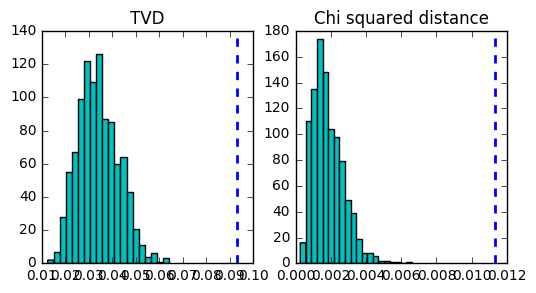

(0.09292236347054891, 0.0, 0.01134335984013713, 0.0)

In [70]:
terminal_permutation(rts_colony, inv_colony, replication=1000, plot=True)

In [168]:
colony_terminal_permute = pd.DataFrame(
    columns=('tvd obs', "tvd p-value", 
             "chi sq obs", "chi sq p-value"))
for inv in set(inv_colony.Inv):
    colony_terminal_permute.loc[inv] = terminal_permutation(
        inv_colony.loc[inv_colony.Inv == inv], 
        inv_colony.loc[inv_colony.Inv != inv], 
        replication=1000)
colony_terminal_permute

,tvd obs,tvd p-value,chi sq obs,chi sq p-value
H,0.214286,0.079,0.064936,0.102
I,0.102415,0.549,0.012247,0.718
E,0.174901,0.737,0.047424,0.813
B,0.128068,0.092,0.024549,0.090
G,0.235889,0.364,0.102145,0.276
F,0.123462,0.584,0.018069,0.750
C,0.071294,0.649,0.008549,0.574
D,0.081834,0.487,0.011655,0.375
A,0.060429,0.367,0.004123,0.586


In [169]:
coulter_terminal_permute = pd.DataFrame(
    columns=('tvd obs', "tvd p-value", 
             "chi sq obs", "chi sq p-value"))
for inv in set(inv_coulter.Investigator):
    coulter_terminal_permute.loc[inv] = terminal_permutation(
        inv_coulter.loc[inv_coulter.Investigator == inv], 
        inv_coulter.loc[inv_coulter.Investigator != inv], 
        replication=1000)
coulter_terminal_permute

,tvd obs,tvd p-value,chi sq obs,chi sq p-value
I,0.106697,0.361,0.013585,0.549
E,0.093926,0.493,0.013670,0.470
B,0.080098,0.672,0.009258,0.716
G,0.147341,0.537,0.026894,0.700
F,0.043527,0.953,0.003161,0.936
C,0.187847,0.101,0.056360,0.082
D,0.074483,0.071,0.009421,0.028
A,0.052700,0.280,0.003806,0.322


<a id='equal_digit_analysis'></a>
## Equal digit analysis

In [82]:
def is_equal_digit(vec):
    """
    This function give the results whether the numbers is equal digits number or not
    """
    return [(count - count % 10)/10 % 10  == count % 10 
            for count in vec if count >= 100]

In [83]:
def binomial_stat(group1, group2):
    prop1 = sum(group1) / len(group1)
    prop2 = sum(group2) / len(group2)
    return abs(prop1 - prop2) / np.sqrt(prop1*(1-prop1) / len(group1) + prop2*(1-prop2) / len(group2))

In [86]:
def binomial_permutation(group1, group2, replication):
    group1 = is_equal_digit(group1[['col1', 'col2', 'col3']].values.flatten())
    group2 = is_equal_digit(group2[['col1', 'col2', 'col3']].values.flatten())
    
    stat_obs = binomial_stat(group1, group2)
    
    stats = []
    for i in np.arange(replication):
        shuffled = random.sample(group1 + group2, 
                                 len(group1 + group2))
        stat_shuffled = binomial_stat(shuffled[:len(group1)], shuffled[len(group1):])
        stats.append(stat_shuffled)
    
    p_value = sum(np.array(stats) > stat_obs) / replication
    return stat_obs, p_value

In [99]:
binomial_permutation(rts_coulter, inv_coulter, replication=1000)

(3.2434748209237791, 0.0030000000000000001)

In [100]:
binomial_permutation(lab1_coulter, inv_coulter, replication=1000)

(0.053549063041849268, 0.92800000000000005)

In [101]:
binomial_permutation(lab2_coulter, inv_coulter, replication=1000)

(1.0830161447419586, 0.25600000000000001)

In [102]:
binomial_permutation(lab1_coulter, rts_coulter, replication=1000)

(1.3508967358195934, 0.151)

In [103]:
binomial_permutation(lab2_coulter, rts_coulter, replication=1000)

(2.6717284703463706, 0.0060000000000000001)

In [104]:
binomial_permutation(lab1_coulter, lab2_coulter, replication=1000)

(0.69358800036750434, 0.48799999999999999)

In [170]:
coulter_equal_permute = pd.DataFrame(
    columns=('statistics', "p-value"))
for inv in set(inv_coulter.Investigator):
    coulter_equal_permute.loc[inv] = binomial_permutation(
        inv_coulter.loc[inv_coulter.Investigator == inv], 
        inv_coulter.loc[inv_coulter.Investigator != inv], 
        replication=1000)
coulter_equal_permute

,statistics,p-value
I,1.385183,0.117
E,0.131363,0.892
B,0.554041,0.528
G,1.050558,0.248
F,1.716358,0.063
C,0.654785,0.446
D,0.195398,0.820
A,0.288420,0.737
